In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

from matplotlib.ticker import StrMethodFormatter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error


days = mdates.DayLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')

In [2]:
df = pd.read_csv('GLODAPv2 Merged Master File.csv')

## We first look at rates of oceanic dissolved organic carbon (ppt) and dissolved organic nitrogen:

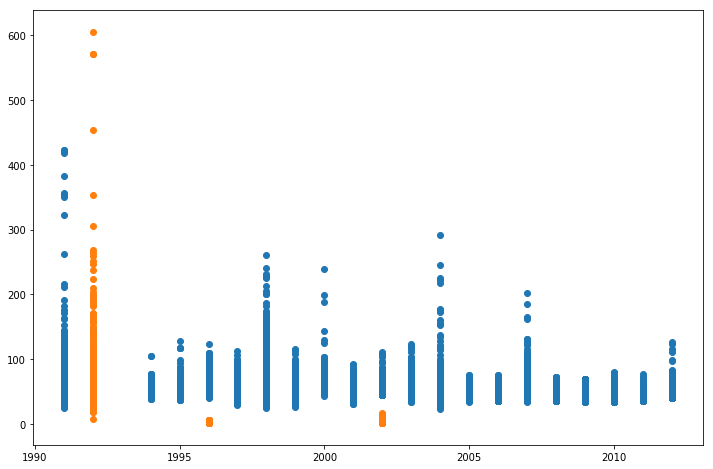

In [3]:
doc = df[['year','doc']]
doc = doc[doc['doc'] != -9999]

don = df[['year','don']]
don = don[don['don'] != -9999]

temp = df[['year','temperature']]
temp = temp[temp['temperature'] != -9999]

fig, axs = plt.subplots(1,1, figsize=(12,8));

axs.scatter(doc['year'], doc['doc'])
axs.scatter(don['year'], don['don'])

In [4]:
df['timestamp'] = pd.to_datetime(df[['year','month','day']], errors='coerce')
temp = df[['timestamp','temperature']]
temp = temp.sort_values(by='timestamp')
temp = temp[temp['temperature'] != -9999]
temp = temp[temp['timestamp'] != pd.NaT]

In [5]:
temp_dmeans = temp.groupby(temp['timestamp']).mean()
temp_dmeans = temp_dmeans.reset_index()

temp_m = pd.DataFrame()
temp_m['temperature'] = temp['temperature']
temp_m['timestamp'] = temp['timestamp'].apply(lambda x: x.replace(day=1))
temp_mmeans = pd.DataFrame()
temp_mmeans = temp_m.groupby(temp_m['timestamp']).mean().reset_index()

temp_y = pd.DataFrame()
temp_y['temperature'] = temp['temperature']
temp_y['timestamp'] = temp['timestamp'].apply(lambda x: x.replace(day=1).replace(month=1))
temp_ymeans = pd.DataFrame()
temp_ymeans = temp_y.groupby(temp_y['timestamp']).mean().reset_index()


## We next consider total ocean temperature readings from 1985-2009:

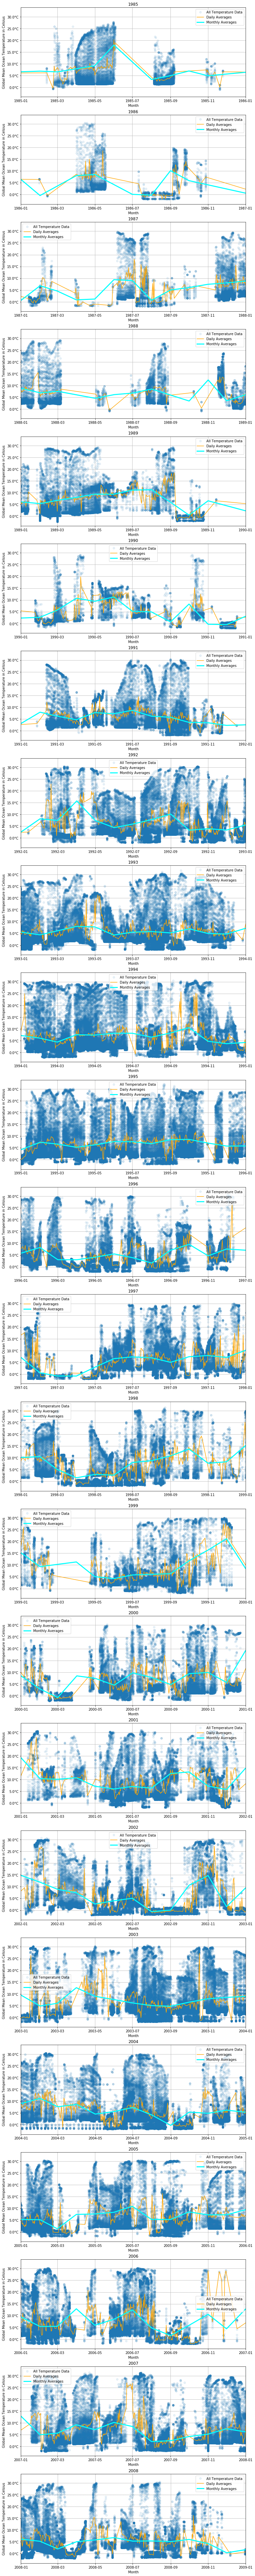

In [8]:
fig, ax = plt.subplots(24,1, figsize=(12,140))

for i, y in enumerate(np.arange(1985,2009)):
    ax[i].plot_date(temp['timestamp'], temp['temperature'], alpha=.1, label='All Temperature Data')
    ax[i].plot(temp_dmeans['timestamp'], temp_dmeans['temperature'], color='orange', label='Daily Averages')
    ax[i].plot(temp_mmeans['timestamp'], temp_mmeans['temperature'], linewidth=3, color='cyan', label='Monthly Averages')
    ax[i].set_xlim(pd.Timestamp(f'{y}-01-01'), pd.Timestamp(f'{y+1}-01-01'))
    ax[i].grid(True)
    ax[i].set_title(y)
    ax[i].set_ylabel('Global Mean Ocean Temperature in Celsius')
    ax[i].set_xlabel('Month')
    ax[i].legend()
    ax[i].yaxis.set_major_formatter(StrMethodFormatter('{x}°C'))

## Summary:

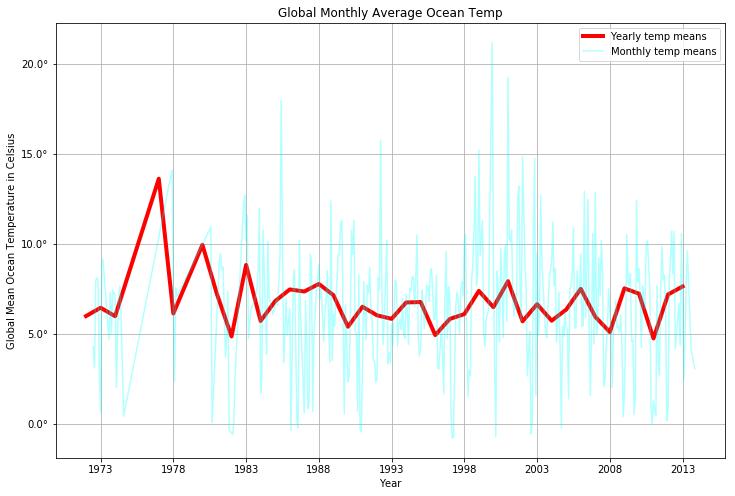

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.plot(temp_ymeans['timestamp'], temp_ymeans['temperature'], color='red', linewidth=4, label='Yearly temp means')
ax.grid(True)
ax.set_title('Global Yearly Average Ocean Temp')

ax.plot(temp_mmeans['timestamp'], temp_mmeans['temperature'], color='cyan', alpha=0.3, label='Monthly temp means')
ax.grid(True)
ax.set_title('Global Monthly Average Ocean Temp')
ax.set_ylabel('Global Mean Ocean Temperature in Celsius')
ax.set_xlabel('Year')
ax.legend()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x}°'))

In [14]:
df = df.sort_values(by='timestamp')
df = df[df['temperature'] != -9999]
df = df[df['timestamp'] != pd.NaT]

In [ ]:
X = df.drop(['temperature', 'timestamp'], axis=1)
y = df.temperature

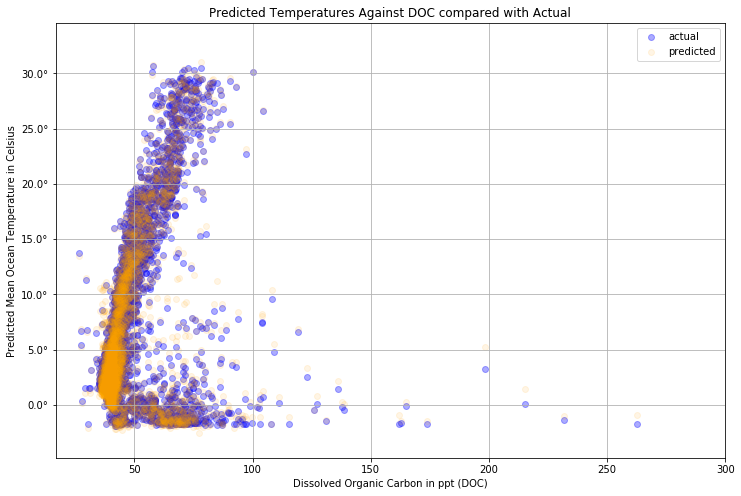

In [31]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 )

model = LinearRegression()
model.fit(X_train,y_train)
X_test_predicted = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(X_test['doc'], y_test, color='blue', alpha=.33, label='actual')
ax.scatter(X_test['doc'], X_test_predicted, color='orange', alpha=.1, label='predicted')
ax.set_xlim((min(X_test[X_test['doc'] > -100]['doc'])-10), 300)
ax.legend()
ax.grid(True)
ax.set_title('Predicted Temperatures Against DOC compared with Actual')
ax.set_ylabel('Predicted Mean Ocean Temperature in Celsius')
ax.set_xlabel('Dissolved Organic Carbon in ppt (DOC)')
ax.legend()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x}°'))


In [49]:
round(mean_squared_error(y_test, X_test_predicted), 3)

1.653

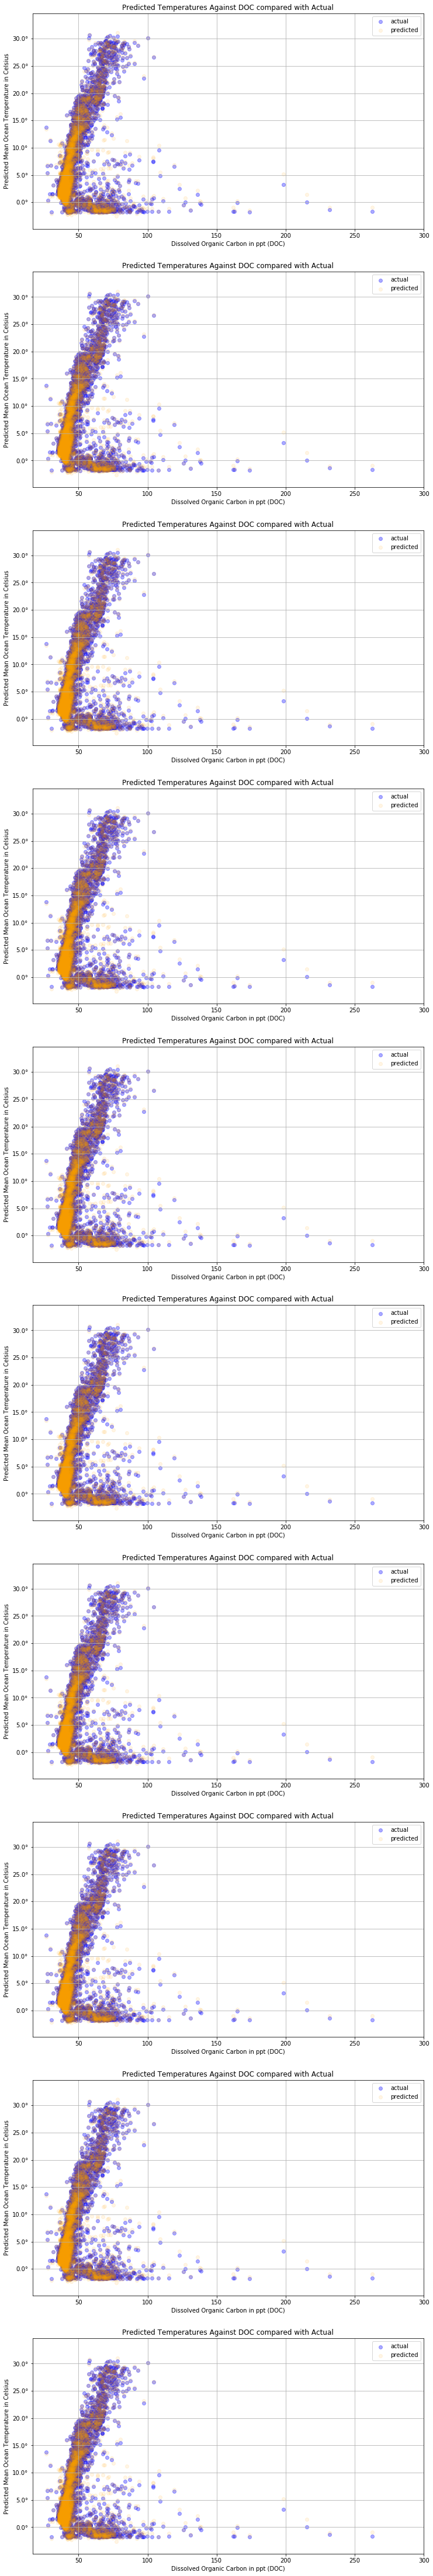

In [34]:
# X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 )

kf = KFold(n_splits=10)
kf.get_n_splits(X)

fig, ax = plt.subplots(10,1,figsize=(12,80))


for (i, (train_index,test_index)) in enumerate(kf.split(X)):
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    X_test_predicted = model.predict(X_test)


    ax[i].scatter(X_test['doc'], y_test, color='blue', alpha=.33, label='actual')
    ax[i].scatter(X_test['doc'], X_test_predicted, color='orange', alpha=.1, label='predicted')
    ax[i].set_xlim((min(X_test[X_test['doc'] > -100]['doc'])-10), 300)
    ax[i].legend()
    ax[i].grid(True)
    ax[i].set_title('Predicted Temperatures Against DOC compared with Actual')
    ax[i].set_ylabel('Predicted Mean Ocean Temperature in Celsius')
    ax[i].set_xlabel('Dissolved Organic Carbon in ppt (DOC)')
    ax[i].legend()
    ax[i].yaxis.set_major_formatter(StrMethodFormatter('{x}°'))

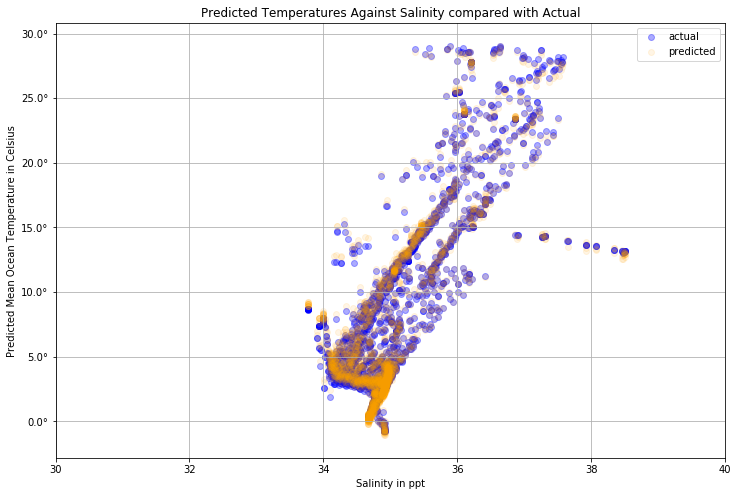

In [77]:
X_train = X[X['year'] != 2013]
y_train = df[df['year'] != 2013]['temperature']
X_test = X[X['year'] == 2013]
y_test = df[df['year'] == 2013]['temperature']

model = LinearRegression()
model.fit(X_train,y_train)
y_test_predicted = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(X_test['salinity'], y_test, color='blue', alpha=.33, label='actual')
ax.scatter(X_test['salinity'], y_test_predicted, color='orange', alpha=.1, label='predicted')
ax.set_xlim(30,40)
ax.legend()
ax.grid(True)
ax.set_title('Predicted Temperatures Against Salinity compared with Actual')
ax.set_ylabel('Predicted Mean Ocean Temperature in Celsius')
ax.set_xlabel('Salinity in ppt')
ax.legend()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x}°'))

In [78]:
round(mean_squared_error(y_test, y_test_predicted), 3)

0.125

In [86]:
models = []
for y in [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]:
    
    try:
        X_train = X[X['year'] != y]
        y_train = df[df['year'] != y]['temperature']
        X_test = X[X['year'] == y]
        y_test = df[df['year'] == y]['temperature']

        model = LinearRegression()
        model.fit(X_train,y_train)
        y_test_predicted = model.predict(X_test)
        models.append([model, round(mean_squared_error(y_test, y_test_predicted), 3) ])
    except ValueError:
        print("year not working is: " + str(y))

m = np.array(models)    
m = m[m[:,1].argsort()]

print("Best performing model MSE: " + str(m[0,1])
final_model = m[0,1]

year not working is: 1975
year not working is: 1976
year not working is: 1979


TypeError: must be str, not numpy.float64

In [94]:
print("Best performing model MSE: " + str(m[0,1]))
final_model = m[0,0]

Best performing model MSE: 0.058


MSE is 0.122


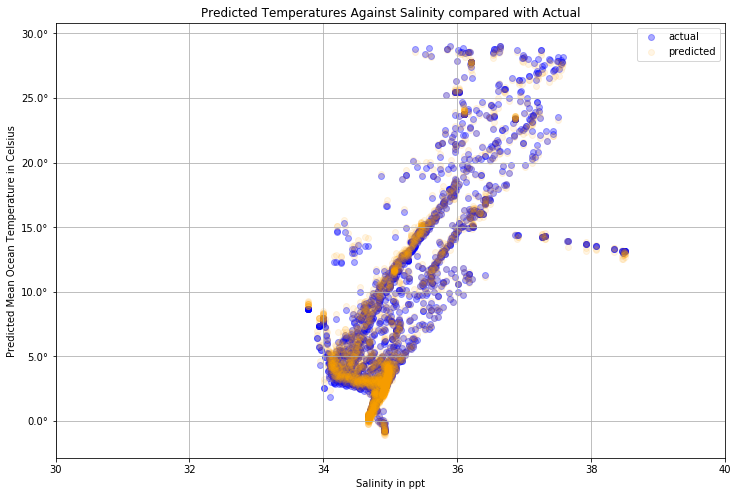

In [96]:
X_test = X[X['year'] == 2013]
y_test = df[df['year'] == 2013]['temperature']

model = final_model
y_test_predicted = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(X_test['salinity'], y_test, color='blue', alpha=.33, label='actual')
ax.scatter(X_test['salinity'], y_test_predicted, color='orange', alpha=.1, label='predicted')
ax.set_xlim(30,40)
ax.legend()
ax.grid(True)
ax.set_title('Predicted Temperatures Against Salinity compared with Actual')
ax.set_ylabel('Predicted Mean Ocean Temperature in Celsius')
ax.set_xlabel('Salinity in ppt')
ax.legend()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x}°'))

print("MSE is " + str(round(mean_squared_error(y_test, y_test_predicted), 3)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)